In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteCaloriesNarrow_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/weightLogInfo_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteMETsNarrow_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlyCalories_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/heartrate_seconds_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteSleep_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlyIntensities_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlySteps_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteSteps

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
plt.style.use('ggplot')
#pd.set_option('max_column')

# **Prepare the data**

In [3]:
df = pd.read_csv('/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv')
hourly_steps = pd.read_csv('/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv')

Looking at daily activity dataset

In [4]:
df.shape

(940, 15)

In [5]:
df.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

In [6]:
df.head(10)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863
5,1503960366,4/17/2016,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728
6,1503960366,4/18/2016,13019,8.59,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149,1921
7,1503960366,4/19/2016,15506,9.88,9.88,0.0,3.53,1.32,5.03,0.0,50,31,264,775,2035
8,1503960366,4/20/2016,10544,6.68,6.68,0.0,1.96,0.48,4.24,0.0,28,12,205,818,1786
9,1503960366,4/21/2016,9819,6.34,6.34,0.0,1.34,0.35,4.65,0.0,19,8,211,838,1775


In [7]:
df.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

Looking at hourly step dataset

In [8]:
hourly_steps.shape

(22099, 3)

In [9]:
hourly_steps.columns

Index(['Id', 'ActivityHour', 'StepTotal'], dtype='object')

In [10]:
hourly_steps.head(10)

,Id,ActivityHour,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,373
1,1503960366,4/12/2016 1:00:00 AM,160
2,1503960366,4/12/2016 2:00:00 AM,151
3,1503960366,4/12/2016 3:00:00 AM,0
4,1503960366,4/12/2016 4:00:00 AM,0
5,1503960366,4/12/2016 5:00:00 AM,0
6,1503960366,4/12/2016 6:00:00 AM,0
7,1503960366,4/12/2016 7:00:00 AM,0
8,1503960366,4/12/2016 8:00:00 AM,250
9,1503960366,4/12/2016 9:00:00 AM,1864


In [11]:
hourly_steps.dtypes

Id               int64
ActivityHour    object
StepTotal        int64
dtype: object

# **Clean the data**

In [12]:
df['Id'] = df['Id'].astype(str)
df['ActivityDate'] = pd.to_datetime(df['ActivityDate'], format = '%m/%d/%Y')
df.dtypes

Id                                  object
ActivityDate                datetime64[ns]
TotalSteps                           int64
TotalDistance                      float64
TrackerDistance                    float64
LoggedActivitiesDistance           float64
VeryActiveDistance                 float64
ModeratelyActiveDistance           float64
LightActiveDistance                float64
SedentaryActiveDistance            float64
VeryActiveMinutes                    int64
FairlyActiveMinutes                  int64
LightlyActiveMinutes                 int64
SedentaryMinutes                     int64
Calories                             int64
dtype: object

In [13]:
df['DistanceDiff'] = df['TotalDistance'] - df['TrackerDistance']
df['DistanceDiff'].value_counts()

DistanceDiff
0.000000    925
1.830000      1
0.190001      1
0.040000      1
0.810000      1
1.049999      1
0.760000      1
1.070000      1
0.980000      1
0.900001      1
1.140000      1
1.160000      1
0.880000      1
0.460000      1
1.160000      1
1.060000      1
Name: count, dtype: int64

In [14]:
df.query('DistanceDiff == 0') #nothing in LoggedActivitiesDistance

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DistanceDiff
0,1503960366,2016-04-12,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985,0.0
1,1503960366,2016-04-13,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797,0.0
2,1503960366,2016-04-14,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776,0.0
3,1503960366,2016-04-15,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745,0.0
4,1503960366,2016-04-16,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847,0.0
936,8877689391,2016-05-09,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710,0.0
937,8877689391,2016-05-10,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832,0.0
938,8877689391,2016-05-11,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832,0.0


In [15]:
df.query('DistanceDiff > 0') #there's value in LoggedActivitiesDistance
# meaning TotalDistance and TrackerDistance is not the same

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DistanceDiff
689,6962181067,2016-04-21,11835,9.71,7.88,4.081692,3.99,2.10,3.51,0.11,53,27,214,708,2179,1.830000
693,6962181067,2016-04-25,13239,9.27,9.08,2.785175,3.02,1.68,4.46,0.10,35,31,282,637,2194,0.190001
707,6962181067,2016-05-09,12342,8.72,8.68,3.167822,3.90,1.18,3.65,0.00,43,21,231,607,2105,0.040000
711,7007744171,2016-04-12,14172,10.29,9.48,4.869783,4.50,0.38,5.41,0.00,53,8,355,1024,2937,0.810000
712,7007744171,2016-04-13,12862,9.65,8.60,4.851307,4.61,0.56,4.48,0.00,56,22,261,1101,2742,1.049999
713,7007744171,2016-04-14,11179,8.24,7.48,3.285415,2.95,0.34,4.96,0.00,34,6,304,1096,2668,0.760000
717,7007744171,2016-04-18,14816,10.98,9.91,4.930550,3.79,2.12,5.05,0.02,48,31,284,1077,2832,1.070000
718,7007744171,2016-04-19,14194,10.48,9.50,4.942142,4.41,0.76,5.31,0.00,53,17,304,1066,2812,0.980000
719,7007744171,2016-04-20,15566,11.31,10.41,4.924841,4.79,0.67,5.86,0.00,60,33,347,1000,3096,0.900001
724,7007744171,2016-04-25,18229,13.34,12.20,4.861792,4.31,1.37,7.67,0.00,51,24,379,986,3055,1.140000


In [16]:
# create weekday column
df['DayOfWeek'] = df['ActivityDate'].dt.day_name()
df['NDayOfWeek'] = df['ActivityDate'].dt.weekday # 0 monday 6 sunday
df.head(10)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DistanceDiff,DayOfWeek,NDayOfWeek
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,0.0,Tuesday,1
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,0.0,Wednesday,2
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,0.0,Thursday,3
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,0.0,Friday,4
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,0.0,Saturday,5
5,1503960366,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728,0.0,Sunday,6
6,1503960366,2016-04-18,13019,8.59,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149,1921,0.0,Monday,0
7,1503960366,2016-04-19,15506,9.88,9.88,0.0,3.53,1.32,5.03,0.0,50,31,264,775,2035,0.0,Tuesday,1
8,1503960366,2016-04-20,10544,6.68,6.68,0.0,1.96,0.48,4.24,0.0,28,12,205,818,1786,0.0,Wednesday,2
9,1503960366,2016-04-21,9819,6.34,6.34,0.0,1.34,0.35,4.65,0.0,19,8,211,838,1775,0.0,Thursday,3


In [17]:
# checking null value
df.isna().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
DistanceDiff                0
DayOfWeek                   0
NDayOfWeek                  0
dtype: int64

In [18]:
# checking duplicate
df.duplicated().sum()

0

In [19]:
# subset the data
df_sub = df[['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance','VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories', 'DayOfWeek', 'NDayOfWeek']].copy()
df_sub.head(10)

,Id,ActivityDate,TotalSteps,TotalDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfWeek,NDayOfWeek
0,1503960366,2016-04-12,13162,8.50,25,13,328,728,1985,Tuesday,1
1,1503960366,2016-04-13,10735,6.97,21,19,217,776,1797,Wednesday,2
2,1503960366,2016-04-14,10460,6.74,30,11,181,1218,1776,Thursday,3
3,1503960366,2016-04-15,9762,6.28,29,34,209,726,1745,Friday,4
4,1503960366,2016-04-16,12669,8.16,36,10,221,773,1863,Saturday,5
5,1503960366,2016-04-17,9705,6.48,38,20,164,539,1728,Sunday,6
6,1503960366,2016-04-18,13019,8.59,42,16,233,1149,1921,Monday,0
7,1503960366,2016-04-19,15506,9.88,50,31,264,775,2035,Tuesday,1
8,1503960366,2016-04-20,10544,6.68,28,12,205,818,1786,Wednesday,2
9,1503960366,2016-04-21,9819,6.34,19,8,211,838,1775,Thursday,3


Hourly steps dataset

In [20]:
hourly_steps.head()

,Id,ActivityHour,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,373
1,1503960366,4/12/2016 1:00:00 AM,160
2,1503960366,4/12/2016 2:00:00 AM,151
3,1503960366,4/12/2016 3:00:00 AM,0
4,1503960366,4/12/2016 4:00:00 AM,0


In [21]:
hourly_steps['Id'] = hourly_steps['Id'].astype(str)
hourly_steps["ActivityHour"] = pd.to_datetime(hourly_steps["ActivityHour"], format = 'mixed')
hourly_steps.dtypes

Id                      object
ActivityHour    datetime64[ns]
StepTotal                int64
dtype: object

In [22]:
hourly_steps["Time"] = hourly_steps["ActivityHour"].dt.time
hourly_steps.head()
hourly_steps.dtypes

Id                      object
ActivityHour    datetime64[ns]
StepTotal                int64
Time                    object
dtype: object

In [23]:
hourly_steps["Time"] = pd.to_datetime(hourly_steps["Time"], format = '%H:%M:%S')
hourly_steps.dtypes

Id                      object
ActivityHour    datetime64[ns]
StepTotal                int64
Time            datetime64[ns]
dtype: object

In [24]:
hourly_steps['Hour'] = hourly_steps['Time'].dt.hour
hourly_steps.head(10)

,Id,ActivityHour,StepTotal,Time,Hour
0,1503960366,2016-04-12 00:00:00,373,1900-01-01 00:00:00,0
1,1503960366,2016-04-12 01:00:00,160,1900-01-01 01:00:00,1
2,1503960366,2016-04-12 02:00:00,151,1900-01-01 02:00:00,2
3,1503960366,2016-04-12 03:00:00,0,1900-01-01 03:00:00,3
4,1503960366,2016-04-12 04:00:00,0,1900-01-01 04:00:00,4
5,1503960366,2016-04-12 05:00:00,0,1900-01-01 05:00:00,5
6,1503960366,2016-04-12 06:00:00,0,1900-01-01 06:00:00,6
7,1503960366,2016-04-12 07:00:00,0,1900-01-01 07:00:00,7
8,1503960366,2016-04-12 08:00:00,250,1900-01-01 08:00:00,8
9,1503960366,2016-04-12 09:00:00,1864,1900-01-01 09:00:00,9


# **Analysis**

In [25]:
df_sub['Id'].nunique()

33

In [26]:
df_sub.describe()

,ActivityDate,TotalSteps,TotalDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,NDayOfWeek
count,940,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,2016-04-26 06:53:37.021276672,7637.910638,5.489702,21.164894,13.564894,192.812766,991.210638,2303.609574,2.918085
min,2016-04-12 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016-04-19 00:00:00,3789.750000,2.620000,0.000000,0.000000,127.000000,729.750000,1828.500000,1.000000
50%,2016-04-26 00:00:00,7405.500000,5.245000,4.000000,6.000000,199.000000,1057.500000,2134.000000,3.000000
75%,2016-05-04 00:00:00,10727.000000,7.712500,32.000000,19.000000,264.000000,1229.500000,2793.250000,5.000000
max,2016-05-12 00:00:00,36019.000000,28.030001,210.000000,143.000000,518.000000,1440.000000,4900.000000,6.000000
std,NaN,5087.150742,3.924606,32.844803,19.987404,109.174700,301.267437,718.166862,1.942379


In [27]:
#categories
#sedentary:less than 5000
#active: between 5000 and 10000
#very active: more than 10000 on average

id_grp = df_sub.groupby(['Id'])
id_avg_step = id_grp['TotalSteps'].mean().sort_values(ascending = False)
id_avg_step = id_avg_step.to_frame()

conditions =[
        (id_avg_step <5000),
        (id_avg_step > 5000) & (id_avg_step < 10000),
        (id_avg_step >= 10000)
]
values = ['sedentary','active','very_active']

id_avg_step['ActivityLevel'] = np.select(conditions,values)

id_activity_level = id_avg_step['ActivityLevel'] # no steps

df_sub['ActivityLevel'] = [id_activity_level[c] for c in df_sub['Id']] # to match id with active level

In [28]:
df_sub.head()

,Id,ActivityDate,TotalSteps,TotalDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfWeek,NDayOfWeek,ActivityLevel
0,1503960366,2016-04-12,13162,8.50,25,13,328,728,1985,Tuesday,1,very_active
1,1503960366,2016-04-13,10735,6.97,21,19,217,776,1797,Wednesday,2,very_active
2,1503960366,2016-04-14,10460,6.74,30,11,181,1218,1776,Thursday,3,very_active
3,1503960366,2016-04-15,9762,6.28,29,34,209,726,1745,Friday,4,very_active
4,1503960366,2016-04-16,12669,8.16,36,10,221,773,1863,Saturday,5,very_active


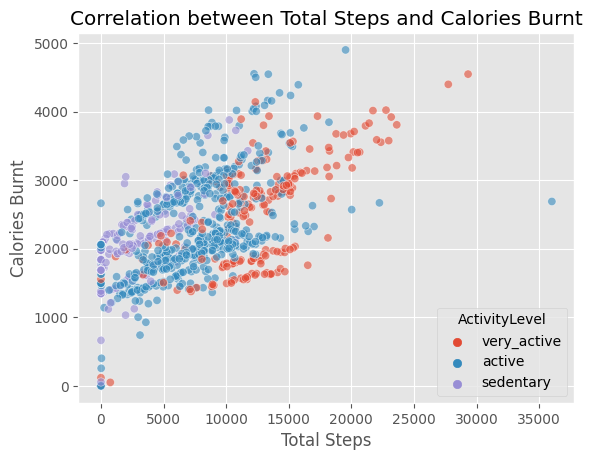

In [29]:
# Correlation between steps and calories burnt

scatter_plot = sns.scatterplot(data=df_sub, x="TotalSteps", y="Calories", 
                               hue=df_sub['ActivityLevel'], alpha=0.6)
scatter_plot.set(xlabel='Total Steps', ylabel="Calories Burnt", 
              title = "Correlation between Total Steps and Calories Burnt")
sns.move_legend(scatter_plot, loc="lower right")
plt.show()

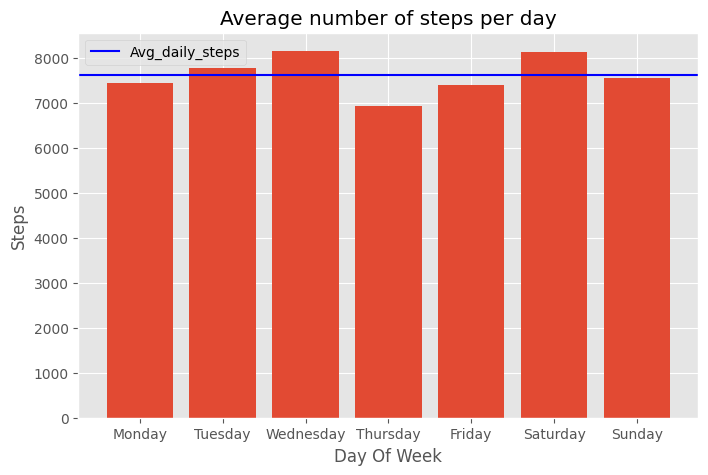

In [30]:
#average steps per day
day_of_week = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
fig,bar_plot = plt.subplots(1,1,figsize =(8,5))

day_grp = df_sub.groupby(['DayOfWeek'])
avg_daily_steps = day_grp['TotalSteps'].mean()
avg_steps = df_sub['TotalSteps'].mean() # just the avg of total steps

plt.bar(avg_daily_steps.index,avg_daily_steps) # x = avg_daily_steps.index because day_grp isn't a dataframe

# sort day of week from mon-sun
bar_plot.set_xticks(range(len(day_of_week)))
bar_plot.set_xticklabels(day_of_week)

# create a avg daily steps line
bar_plot.axhline( y = avg_daily_steps.mean(), color = 'blue',label = 'Avg_daily_steps')

bar_plot.set(xlabel='Day Of Week', ylabel="Steps", 
              title = "Average number of steps per day")
plt.legend()
plt.show()

Text(0.5, 1.0, '% of activity lavels in minutes')

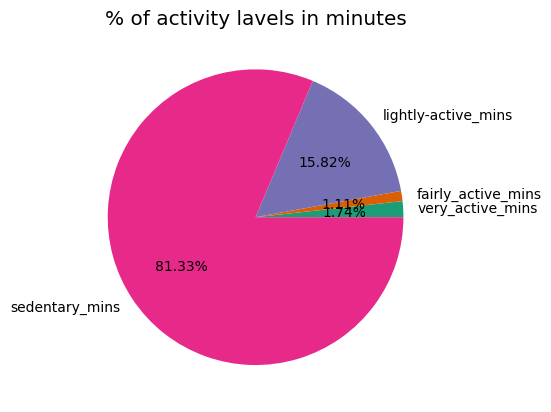

In [31]:
#percentage of activity in minutes
very_active_mins = df['VeryActiveMinutes'].sum()
fairly_active_mins = df['FairlyActiveMinutes'].sum()
lightly_active_mins = df['LightlyActiveMinutes'].sum()
sedentary_mins = df['SedentaryMinutes'].sum()

slices = [very_active_mins,fairly_active_mins,lightly_active_mins,sedentary_mins]
labels = ['very_active_mins','fairly_active_mins','lightly-active_mins','sedentary_mins']
palette_color = sns.color_palette("Dark2")

pie_chart = plt.pie(slices, labels= labels, colors = palette_color, autopct = '%.2f%%')

plt.title('% of activity lavels in minutes')

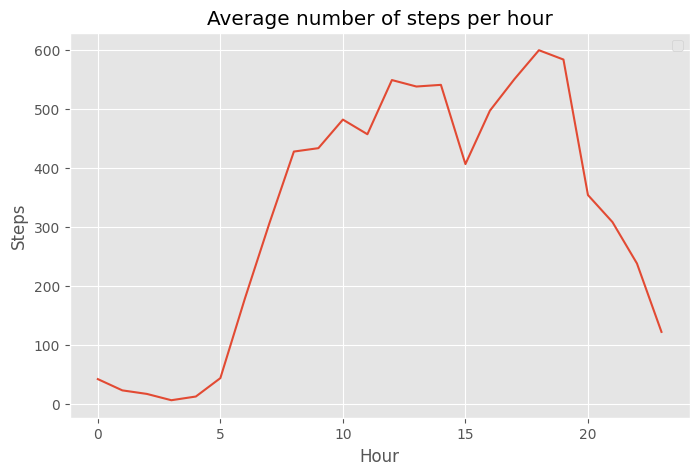

In [32]:
#average steps per hour
fig,line_chart = plt.subplots(1,1,figsize =(8,5))

hour_grp = hourly_steps.groupby(['Hour'])
avg_hourly_steps = hour_grp['StepTotal'].mean()
avg_steps = hourly_steps['StepTotal'].mean() 

plt.plot(avg_hourly_steps.index,avg_hourly_steps)

line_chart.set(xlabel='Hour', ylabel="Steps", 
              title = "Average number of steps per hour")
plt.legend()
plt.show()